In [2]:
import pandas as pd
import numpy as np

In [3]:
columns_name=['user_id','item_id','rating','timestamp']

In [41]:
df = pd.read_csv('/Users/nikhilraizada/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data',sep='\t',names=columns_name)

In [42]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [43]:
movie_titles =  pd.read_csv('/Users/nikhilraizada/Downloads/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles')

In [44]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [45]:
final_df = pd.merge(df,movie_titles,on='item_id')

In [46]:
final_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [49]:
final_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [50]:
#Now keep in mind we did do a group buy here so it could be the case that a lot of these movies here
#only have one or two people that saw it and happen to give it a five star rating.

In [51]:
final_df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [56]:
ratings = pd.DataFrame(final_df.groupby('title')['rating'].mean())

In [57]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [58]:
#add a new columns

In [61]:
ratings['number of ratings'] = pd.DataFrame(final_df.groupby('title')['rating'].count())

In [62]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


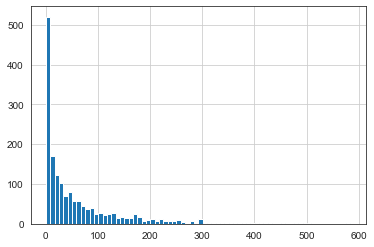

In [63]:
ratings['number of ratings'].hist(bins=70)

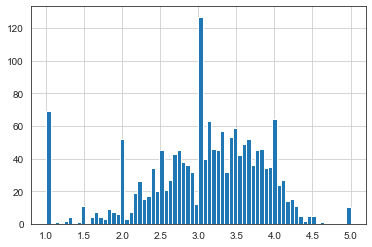

In [64]:
ratings['rating'].hist(bins=70)

In [65]:
#You probably notice that there are some peaks at the whole numbers such as 1.0 2.0 3.0 4.0 and
#5.0.

In [66]:
#the distribution or relationship between the actual average rating and the number of ratings.

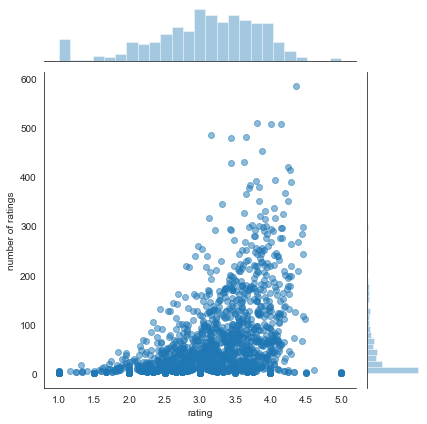

In [67]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

In [68]:
#Now looking at this data it looks like as you get more ratings you're more likely to actually have a
#higher rating of a movie.And that kind of makes sense because if your movie is better, the better your 
#movie the more people that are in to watch it and the more people that are going to watch it the more 
#likely you're going to have a higher number of people reviewing or rating the movie.

In [69]:
final_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [70]:
#We're going to go ahead and do is use pivot table to get this into matrix form.

In [73]:
moviemat= final_df.pivot_table(index='user_id',columns='title',values='rating')

In [74]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#checking most rated movies

In [76]:
ratings.sort_values('number of ratings',ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [78]:
#grabbing rating for two movies

In [81]:
star_wars_user_rating = moviemat['Star Wars (1977)']
liar_liar_user_rating = moviemat['Liar Liar (1997)']

In [82]:
star_wars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [83]:
#we are checking how the correlation of every other movie that that specific user behavior
#on the Star Wars movie so I can say similar Star Wars is equal to the movie Matrix which remember was
#this where the user ID was essentially just a row of all the ratings they gave to all the movies they
#watched or no.

In [103]:
similar_to_star_wars = moviemat.corrwith(star_wars_user_rating)
similar_to_liar_liar = moviemat.corrwith(liar_liar_user_rating)

/Users/nikhilraizada/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/nikhilraizada/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [91]:
corr_starwars = pd.DataFrame(similar_to_star_wars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [92]:
corr_starwars.head()
#It tells us how correlated this movies user ratings were to the user ratings of the Star Wars movie.

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [94]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)
#following are the movie which are perfectly correlated with star wars

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [95]:
#we are going to go ahead and filter up my movies to have less than 100 reviews because it is most likely that the 
#same user has rated for the other movies as well.

In [96]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [97]:
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [99]:
#the reason we used join here and sort of merge is because I have the title as the index of my data frame which 
#makes it a good fit for this join method

In [101]:
#filtering out movies that dont have at least 100 ratings

In [102]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation',ascending = False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [105]:
corr_liar_liar = pd.DataFrame(similar_to_liar_liar,columns=['Correlation'])
corr_liar_liar.dropna(inplace=True)

In [106]:
corr_liar_liar = corr_liar_liar.join(ratings['number of ratings'])

In [109]:
corr_liar_liar[corr_liar_liar['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
